In [1]:
import numpy as np
import scipy.integrate as integrate
import time
import matplotlib
from matplotlib import pyplot as plt

# Курсовая работа  
### Задача 5.5  
Функция ошибок задается выражением 
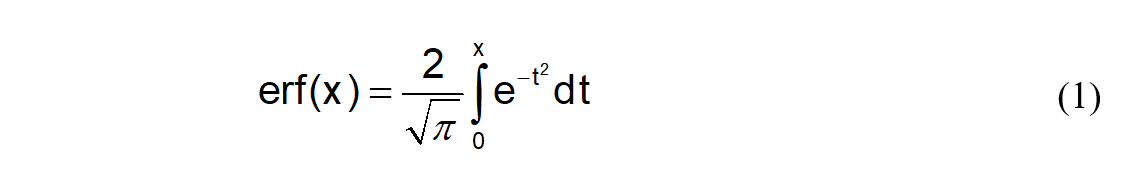
которое не выражается в элементарных функциях.  
Для вычисления ее значения в точке x можно также использовать эквивалентную (1) задачу Коши  
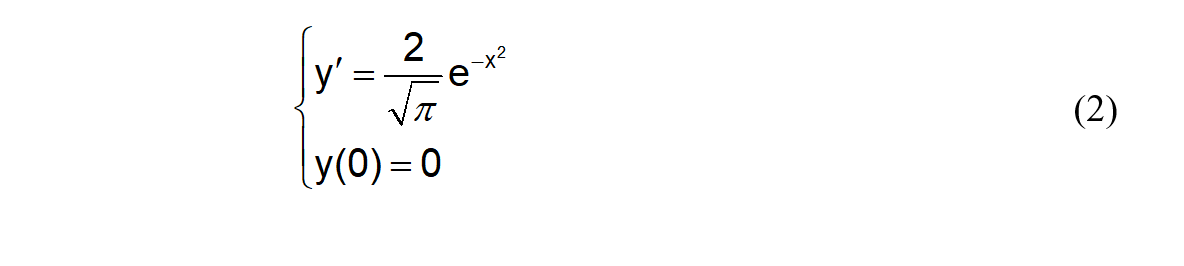

## <span style="color:indigo">Метод Симпсона</span>

### 2.	Протабулировать функцию erf(x) на отрезке [0, 2] с шагом  h = 0.1, вычисляя интеграл (1) методом Симпсона  с некоторой точностью  eps
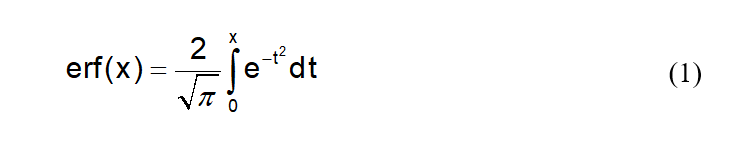

In [2]:
eps=1e-8
erf_format = 8
a = 0
b = 2
h = 0.1
y0 = 0
x0 = a
n_segment = int((b-a)/h)
p = 4

In [3]:
def f_S(t):
    return (2/np.sqrt(np.pi)*np.exp(-t**2))
def f_test(t):
    return np.exp(t)
def real_solution(x):
    return np.exp(x) - 1


### Для дальнейшего сравнения посчитаем интеграл встроенным методом Python

In [4]:
print("точность eps:", eps)
print("количество отрезков разбиения:", n_segment, "\n")
I_integrate=[a]
for i in range(1, n_segment+1):
    I_integrate.append(integrate.quad(f_S, a, a+i*h , epsabs = eps)[0])
print("Значение erf(x), посчитанное встроенным методом Python \n")
print('  {:.6s}    {:.6s}'.format("x", "erf(x)"))
for i in range(n_segment+1):
    print('{:.1f}   {:.{}f}'.format(a+i*h,I_integrate[i], erf_format))
print('\n\n')


точность eps: 1e-08
количество отрезков разбиения: 20 

Значение erf(x), посчитанное встроенным методом Python 

  x    erf(x)
0.0   0.00000000
0.1   0.11246292
0.2   0.22270259
0.3   0.32862676
0.4   0.42839236
0.5   0.52049988
0.6   0.60385609
0.7   0.67780119
0.8   0.74210096
0.9   0.79690821
1.0   0.84270079
1.1   0.88020507
1.2   0.91031398
1.3   0.93400794
1.4   0.95228512
1.5   0.96610515
1.6   0.97634838
1.7   0.98379046
1.8   0.98909050
1.9   0.99279043
2.0   0.99532227





### Расчетная формула метода Симпсона
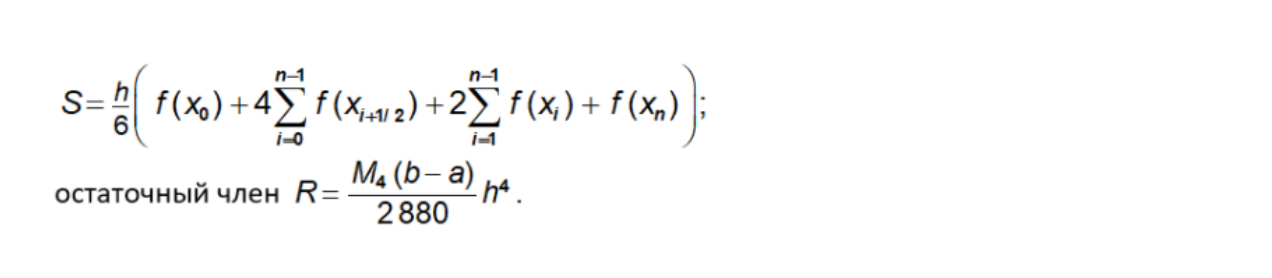

In [5]:
#метод Симпсона для частичного отрезка
def Simpson_i(a,b,h,f_S):
    S1 = 0
    S2 = 0
    n = round((b - a)/ h) + 1
    x_temp = np.arange(a , b+h/2 , h)
    x_temp1 = np.arange(a+h/2 , b , h)
    S1 = 2 * sum (f_S(x_temp[i]) for i in range (1 , n - 1 ))
    S2 = 4 * sum(f_S(x_temp1[i-1])  for i in range (1 , n))
    S = (h/6)*(f_S(a) + S1 + S2 + f_S(b))
    return S

In [6]:
#метод Симпсона с учетом eps
def Simpson_eps_i(a, b, n, f_S, eps, p):
    fl = True
    while(fl):
        fl = False
        h = (b-a)/n
        _2n = 2 * n
        h_2n = (b-a)/_2n
        S_h = Simpson_i(a, b, h, f_S)
        S_2h = Simpson_i(a, b,h_2n, f_S) 
        err = abs(S_2h - S_h)/(2**p - 1)
        if (err>eps):
                fl = True
                _2n *= 2 
                n *= 2

    return S_2h

#табулирование с помощью метода Симпсона
def tab_Simpson(a, b, h, f_S, y0,eps):
    n=round((b-a)/h)
    #n= 4
    y_tab = [y0]
    x_tab = [a]
    for i in range(1, n_segment+1):
        x_tab.append(a+i*h)
        y_tab.append(Simpson_eps_i(a, a+i*h, n, f_S, eps, p))
    return n, x_tab, y_tab   

### Проверка тестового примера

Тестовый пример для метода Симпсона: 
Точность eps:  1e-08
Кол-во отрезков табуляции:  20


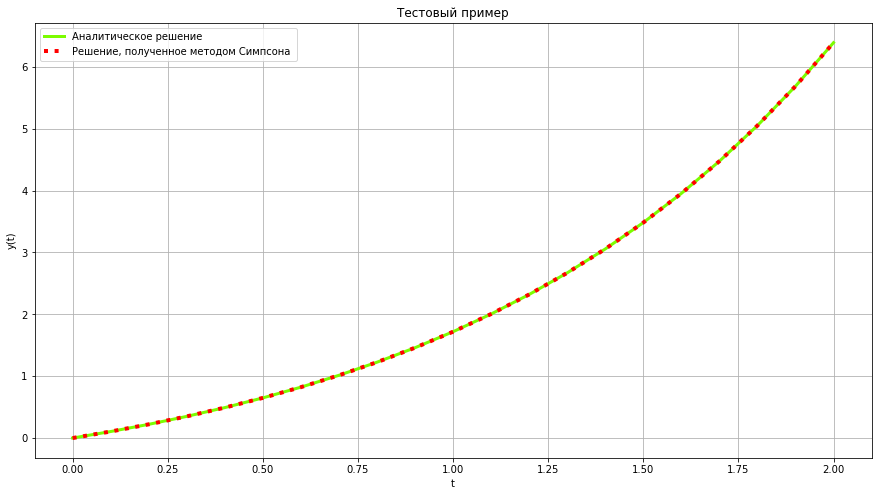

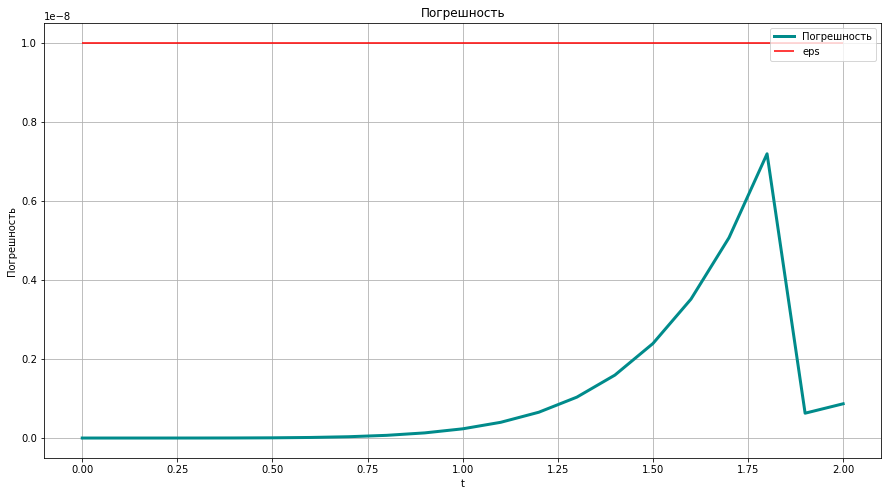

In [7]:
#тестовый пример
# тест Симпсон
import matplotlib
from matplotlib import pyplot as plt

h = 0.1
n_segment=round((b-a)/h)
print ("Тестовый пример для метода Симпсона: ")
print ("Точность eps: ", eps)
print("Кол-во отрезков табуляции: ", n_segment)
x_tab_test_S = [a]
for i in range(1, n_segment+1):
    x_tab_test_S.append(a+i*h)
x_tab_test_S = np.array(x_tab_test_S)

y0_test = 0
n, x_tab, y_tab = tab_Simpson(a, b, h, f_test, y0,eps)

fig, ax = plt.subplots(figsize =(15,8))
plt.title('Тестовый пример')
ax.plot(x_tab_test_S, real_solution(x_tab_test_S), label = 'Аналитическое решение', color = 'lawngreen',linewidth =3)
ax.plot(x_tab, y_tab, label = 'Решение, полученное методом Симпсона ', color = 'r',linewidth =4,linestyle = 'dotted')
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()


fig, ax = plt.subplots(figsize =(15,8))
plt.title('Погрешность')
ax.hlines(eps, 0, 2, color = 'r', label = 'eps')
ax.plot(x_tab_test_S, abs(real_solution(x_tab) - y_tab), label = 'Погрешность', color = 'darkcyan',linewidth =3)
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('Погрешность')
ax.legend()



#### Функция erf(x), протабулированная  на отрезке [0, 2] с шагом  h = 0.1, с помощью вычисления интеграла (1) методом Симпсона  с некоторой точностью  eps

In [8]:
start_time = time.time()
n_Simpson, x_tab_Simpson, y_tab_Simpson = tab_Simpson(a, b, h, f_S, y0,eps)
t_Simpson = (time.time() - start_time)

print ("Точность eps: ", eps)
print("Отрезок: [", a, ';',b,"]" )
print("Время выполнения табуляции {:.8f} секунд " .format(t_Simpson))
print("Количество отрезков табуляции:", n_segment, "\n")
print("Значение erf(x), посчитанное методом Симпсона \n")
print(' {:.6s}      {:.6s}'.format("x", "erf(x)"))

for i in range(n_segment+1):
    print('{:.1f}   {:.{}f}'.format(x_tab_Simpson[i], y_tab_Simpson[i], erf_format))

print('\n\n')


Точность eps:  1e-08
Отрезок: [ 0 ; 2 ]
Время выполнения табуляции 0.01804519 секунд 
Количество отрезков табуляции: 20 

Значение erf(x), посчитанное методом Симпсона 

 x      erf(x)
0.0   0.00000000
0.1   0.11246292
0.2   0.22270259
0.3   0.32862676
0.4   0.42839236
0.5   0.52049988
0.6   0.60385609
0.7   0.67780119
0.8   0.74210096
0.9   0.79690821
1.0   0.84270079
1.1   0.88020507
1.2   0.91031398
1.3   0.93400794
1.4   0.95228512
1.5   0.96610515
1.6   0.97634838
1.7   0.98379046
1.8   0.98909050
1.9   0.99279043
2.0   0.99532226





Точность eps:  1e-08
Отрезок: [ 0 ; 2 ]
  x   м.Симпсона - integrate.quad
0.0       0.00000000
0.1       0.00000000
0.2       0.00000000
0.3       0.00000000
0.4       0.00000000
0.5       0.00000000
0.6       0.00000000
0.7       0.00000000
0.8       0.00000000
0.9       0.00000000
1.0       0.00000000
1.1       0.00000000
1.2       0.00000000
1.3       0.00000000
1.4       0.00000000
1.5       0.00000000
1.6       0.00000000
1.7       0.00000000
1.8       0.00000000
1.9       0.00000000
2.0       0.00000000


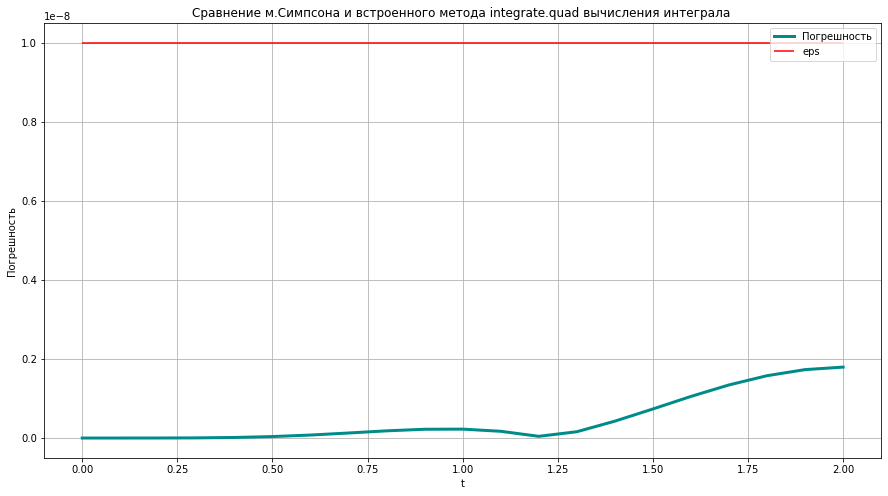

In [9]:
#разница между Cимпсоном и встроенным методом 
print ("Точность eps: ", eps)
print("Отрезок: [", a, ';',b,"]" )
print('  {:.6s}   {:.50s}'.format("x", "м.Симпсона - integrate.quad"))
for i in range(n_segment+1):
    print('{:.1f}       {:.{}f}'.format(x_tab_Simpson[i], abs(y_tab_Simpson[i] - I_integrate[i]), erf_format))
    
n_Simpson, x_tab_Simpson, y_tab_Simpson = tab_Simpson(a, b, h, f_S, y0,eps)
I_integrate = np.array(I_integrate)

fig, ax = plt.subplots(figsize =(15,8))
plt.title('Сравнение м.Симпсона и встроенного метода integrate.quad вычисления интеграла ')
ax.plot(x_tab_Simpson, abs(y_tab_Simpson - I_integrate), label = 'Погрешность', color = 'darkcyan',linewidth =3)
ax.grid()
ax.hlines(eps, 0, 2, color = 'r', label = 'eps')
ax.set_xlabel('t')
ax.set_ylabel('Погрешность')
ax.legend()

### Построить график зависимости времени табулирования от точности   в том и другом случае.



In [10]:
def outputTable_Simpson(t_RK,time_list, eps_list, n_segmet, n_format,x_tab, y_tab):
    print("-----------------------------------------------------------------")
    print("Время выполнения табуляции {:.8f} секунд " .format(t_RK) )
    time_list.append(t_RK)
    print ("Точность eps: ","{:.0e}".format(eps_list[i]) )
    print("Значение erf(x), посчитанное методом Симпсона \n")
    for j in range(n_segment+1):
        print('{:.1f}   {:.{}f}'.format(x_tab[j], y_tab[j], n_format))

In [11]:
#метод Симпсона, рассматриваем eps:  [1.e-10 1.e-11 1.e-12 1.e-13 1.e-14]
h_tab= 0.1
eps_list = [1e-10]
time_list = []
n_segmet = 20

k = 5
for i in range (1, k):
    eps_list.append(eps_list[i-1]/10)
x_Simpson = np.array(eps_list)



for i in range (0, k):
    start_time = time.time()
    n_Simpson, x_tab_Simpson, y_tab_Simpson = tab_Simpson(a, b, h, f_S, y0,eps_list[i])
    t_RK = time.time() - start_time
    n_format = i + 10
    outputTable_Simpson(t_RK,time_list, eps_list, n_segmet, n_format,x_tab, y_tab)
    
print('\n')      
print ("eps: ", x_Simpson)    
y_Simpson = np.array(time_list)
print ("time: ", y_Simpson)
print("-----------------------------------------------------------------")   
print(' {:.6s}      {:.6s}'.format("eps", "t(eps)"))
for i in range(k):
    print('{:.0e}   {:.{}f}'.format(x_Simpson[i], y_Simpson[i], 8))
print('\n\n')       


-----------------------------------------------------------------
Время выполнения табуляции 0.05785894 секунд 
Точность eps:  1e-10
Значение erf(x), посчитанное методом Симпсона 

0.0   0.0000000000
0.1   0.1051709181
0.2   0.2214027582
0.3   0.3498588076
0.4   0.4918246976
0.5   0.6487212707
0.6   0.8221188004
0.7   1.0137527075
0.8   1.2255409286
0.9   1.4596031113
1.0   1.7182818287
1.1   2.0041660243
1.2   2.3201169234
1.3   2.6692966687
1.4   3.0551999684
1.5   3.4816890727
1.6   3.9530324279
1.7   4.4739473968
1.8   5.0496474716
1.9   5.6858944429
2.0   6.3890560998
-----------------------------------------------------------------
Время выполнения табуляции 0.11481881 секунд 
Точность eps:  1e-11
Значение erf(x), посчитанное методом Симпсона 

0.0   0.00000000000
0.1   0.10517091808
0.2   0.22140275816
0.3   0.34985880758
0.4   0.49182469764
0.5   0.64872127071
0.6   0.82211880040
0.7   1.01375270750
0.8   1.22554092856
0.9   1.45960311129
1.0   1.71828182869
1.1   2.00416602434

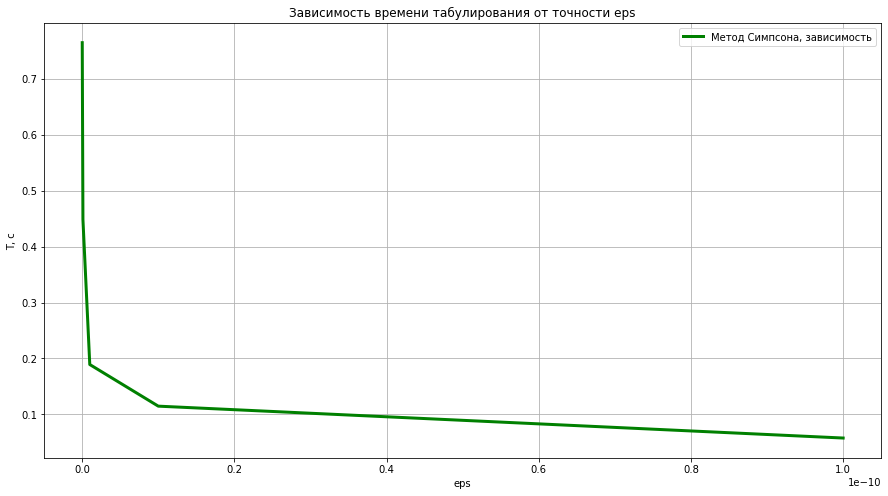

In [12]:
fig, ax = plt.subplots(figsize =(15,8))
plt.title('Зависимость времени табулирования от точности eps')
ax.plot(x_Simpson, y_Simpson, label = 'Метод Симпсона, зависимость', color = 'g',linewidth =3)
ax.grid()
ax.set_xlabel('eps')
ax.set_ylabel('T, c')
ax.legend()


-----------------------------------------------------------------
Время выполнения табуляции 0.02093911 секунд 
Точность eps:  1e-03
Значение erf(x), посчитанное методом Симпсона 

0.0   0.000
0.1   0.105
0.2   0.221
0.3   0.350
0.4   0.492
0.5   0.649
0.6   0.822
0.7   1.014
0.8   1.226
0.9   1.460
1.0   1.718
1.1   2.004
1.2   2.320
1.3   2.669
1.4   3.055
1.5   3.482
1.6   3.953
1.7   4.474
1.8   5.050
1.9   5.686
2.0   6.389
-----------------------------------------------------------------
Время выполнения табуляции 0.02874422 секунд 
Точность eps:  1e-04
Значение erf(x), посчитанное методом Симпсона 

0.0   0.0000
0.1   0.1052
0.2   0.2214
0.3   0.3499
0.4   0.4918
0.5   0.6487
0.6   0.8221
0.7   1.0138
0.8   1.2255
0.9   1.4596
1.0   1.7183
1.1   2.0042
1.2   2.3201
1.3   2.6693
1.4   3.0552
1.5   3.4817
1.6   3.9530
1.7   4.4739
1.8   5.0496
1.9   5.6859
2.0   6.3891
-----------------------------------------------------------------
Время выполнения табуляции 0.02504134 секунд 
Т

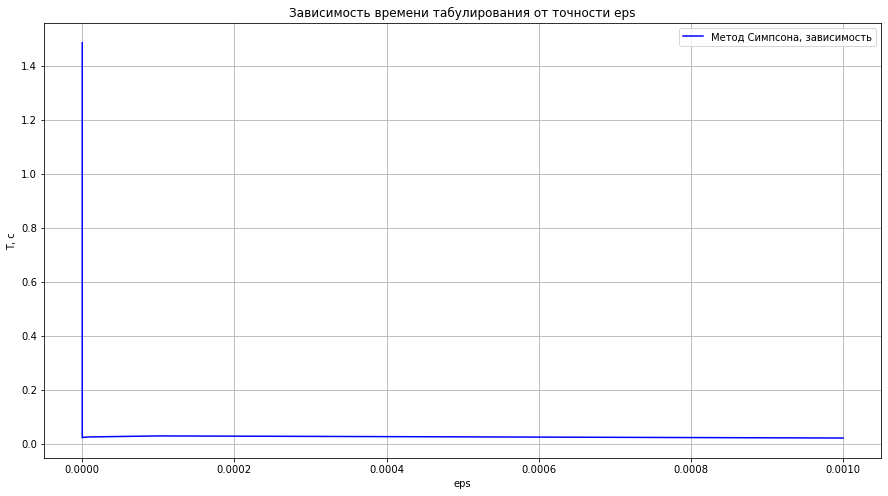

In [13]:
#график для 
#метод Симпсона
h_tab= 0.1
eps_list = [1e-03]
time_list = []
n_segmet = 20

k = 13
for i in range (1, k):
    eps_list.append(eps_list[i-1]/10)
x_Simpson = np.array(eps_list)

for i in range (k):
    start_time = time.time()
    n_Simpson, x_tab_Simpson, y_tab_Simpson = tab_Simpson(a, b, h, f_S, y0,eps_list[i])
    t_RK = time.time() - start_time
    n_format = i + 3
    outputTable_Simpson(t_RK,time_list, eps_list, n_segmet, n_format,x_tab, y_tab)
    
print('\n')      
print ("eps: ", x_Simpson)    
y_Simpson = np.array(time_list)
print ("time: ", y_Simpson)
print("-----------------------------------------------------------------")   
print(' {:.6s}      {:.6s}'.format("eps", "t(eps)"))
for i in range(k):
    print('{:.0e}   {:.{}f}'.format(x_Simpson[i], y_Simpson[i], 8))
print('\n\n')    
fig, ax = plt.subplots(figsize =(15,8))
plt.title('Зависимость времени табулирования от точности eps')
ax.plot(x_Simpson, y_Simpson, label = 'Метод Симпсона, зависимость', color = 'b')
ax.grid()
ax.set_xlabel('eps')
ax.set_ylabel('T, c')
ax.legend()       

## <span style="color:indigo">Метод Рунге-Кутты 4-го порядка </span>

### 3.	Протабулировать функцию erf(x) на отрезке [0, 2] с шагом  h = 0.1, решая задачу Коши (2) методом Рунге – Кутты 4-го порядка с той же точностью 
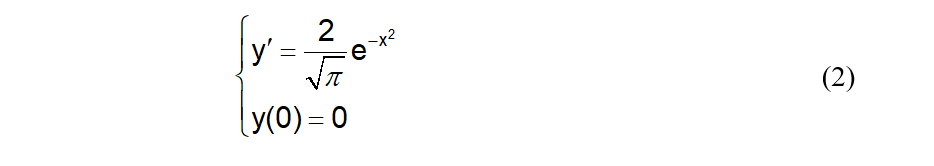

In [14]:
eps=1e-8
erf_format =8
a = 0
b = 2
h = 0.1
y0 = 0
x0 = a
n_segment = int((b-a)/h)
p = 4

###  Метод Рунге-Кутты 4-го порядка
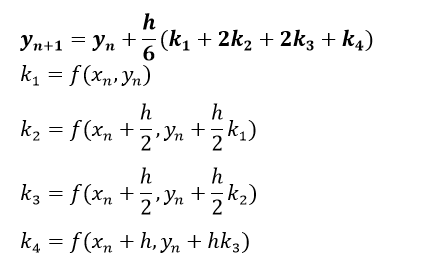

In [15]:
def f(x,y):
    return (2/np.sqrt(np.pi)*np.exp(-x**2))
def f_test(x, y):
    return np.exp(x)

def RK_y_next(y_prev, x_prev, h_i, f):
    k1 = f(x_prev, y_prev)
    k2 = f(x_prev + h_i/2, y_prev + h_i/2 * k1)
    k3 = f(x_prev + h_i/2, y_prev + h_i/2 * k2)
    k4 = f(x_prev + h_i, y_prev + h_i * k3)
    y_i= y_prev + h_i/6*(k1 + 2*k2 + 2*k3 + k4)
    return y_i

In [16]:
def RK_i(a,y0, x, n_1h,f , eps):
    n_2h =round(n_1h/2) 
    n_1h =n_2h *2
    fl=True
    while (fl):
        fl=False
        _2h=(x-a)/(n_2h)
        h=((x-a)/(n_1h))
        y_1h= np.zeros(n_1h+1)
        y_1h[0] = y0
        y_2h = np.zeros(n_2h+1) 
        y_2h[0] = y0
        x0 = a
        for i in range (1 , n_2h + 1):
                y_2h[i] = RK_y_next(y_2h[i-1],x0+2*(i-1)*h,_2h,f)

                y_1h[2*i-1] =RK_y_next(y_1h[2*i-2],x0+(2*i-2)*h, h,f)
                y_1h[2*i] = RK_y_next(y_1h[2*i-1],x0+(2*i-1)*h,h,f)

        err = abs(y_2h[n_2h] - y_1h[2*n_2h])/15
        if (err>=eps):
            fl = True
            n_2h =n_2h*2 #увеличиваем кол-во отрезков разбиения
            n_1h =n_1h*2
    return y_1h,y_2h,h,y_2h[n_2h]
a=0
x=0.6
n_1h=100
y0=0
y1h, y2h, h, result=RK_i(a,y0, x, n_1h, f, eps)
print("==========================================")
print("eps: ",eps)
print("Отрезок: [", a, ';',x,"]" )
print("Решение: ",'{:.{}f}' .format(result,  erf_format) )



eps:  1e-08
Отрезок: [ 0 ; 0.6 ]
Решение:  0.60385609


In [17]:
def tab(a, b, h_tab, f, y0,eps):
    n=round((b-a)/h_tab)
    y_tab = [y0]
    x_tab = [a]
    for i in range(1, n_segment+1):
        x_tab.append(a+i*h_tab)
        y_tab.append(RK_i(a,y0, a+i*h_tab, n_1h, f,eps)[3] )
    return n, x_tab, y_tab
def outputTable_RK(t_RK,time_list, eps_list, n_segmet, n_format,x_tab, y_tab):
    print("-----------------------------------------------------------------")
    print("Время выполнения табуляции {:.8f} секунд " .format(t_RK) )
    time_list.append(t_RK)
    print ("Точность eps: ","{:.0e}".format(eps_list[i]) )
    print("Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка \n")
    for j in range(n_segment+1):
        print('{:.1f}   {:.{}f}'.format(x_tab[j], y_tab[j], n_format))

In [18]:
h_tab= 0.1
start_time = time.time()
n, x_tab, y_tab = tab(a, b, h_tab, f, y0,eps)
print ("Точность eps: ", eps)
print("Отрезок: [", a, ';',b,"]" )
t_RK = time.time() - start_time
print("Время выполнения табуляции %s секунд " %t_RK )
print("Количество отрезков табуляции:", n_segment, "\n")
print("Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка \n")
print('  {:.6s}      {:.6s}'.format("x", "erf(x)"))

for i in range(n_segment+1):
    print('{:.1f}   {:.{}f}'.format(x_tab[i], y_tab[i], erf_format))

print('\n\n')



Точность eps:  1e-08
Отрезок: [ 0 ; 2 ]
Время выполнения табуляции 0.10004234313964844 секунд 
Количество отрезков табуляции: 20 

Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка 

  x      erf(x)
0.0   0.00000000
0.1   0.11246292
0.2   0.22270259
0.3   0.32862676
0.4   0.42839236
0.5   0.52049988
0.6   0.60385609
0.7   0.67780119
0.8   0.74210096
0.9   0.79690821
1.0   0.84270079
1.1   0.88020507
1.2   0.91031398
1.3   0.93400794
1.4   0.95228512
1.5   0.96610515
1.6   0.97634838
1.7   0.98379046
1.8   0.98909050
1.9   0.99279043
2.0   0.99532226





In [19]:
# тест РК - 4
import matplotlib
from matplotlib import pyplot as plt

def f_test(x, y):
    return np.exp(x)
def real_solution(x):
    return np.exp(x) + 1

h = 0.1
n_segment=round((b-a)/h)
print ("Тестовый пример для метода Рунге-Кутты 4-го порядка: ")
print ("Точность eps: ", eps)
print("Кол-во отрезков табуляции: ", n_segment)
x_tab_test_RK = [a]
for i in range(1, n_segment+1):
    x_tab_test_RK.append(a+i*h)
x_tab_test_RK = np.array(x_tab_test_RK)

y0_test = 2
n, x_tab, y_tab = tab(a, b, h_tab,f_test , y0_test, eps)

Тестовый пример для метода Рунге-Кутты 4-го порядка: 
Точность eps:  1e-08
Кол-во отрезков табуляции:  20


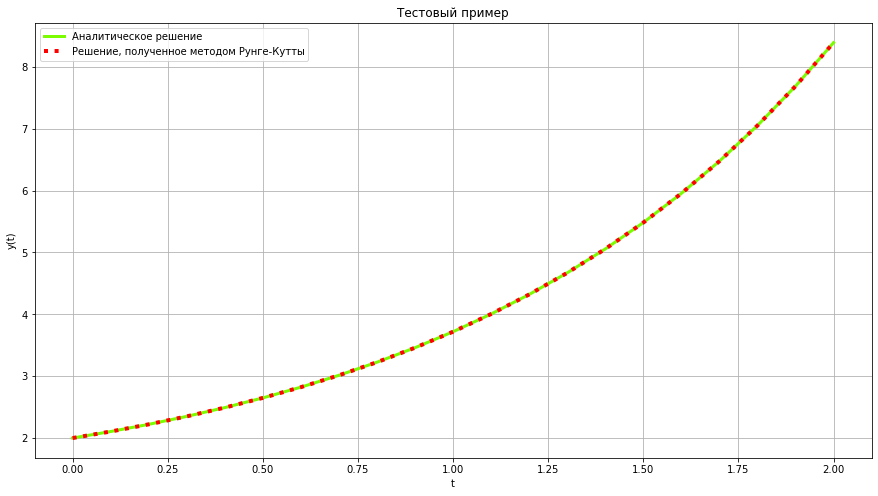

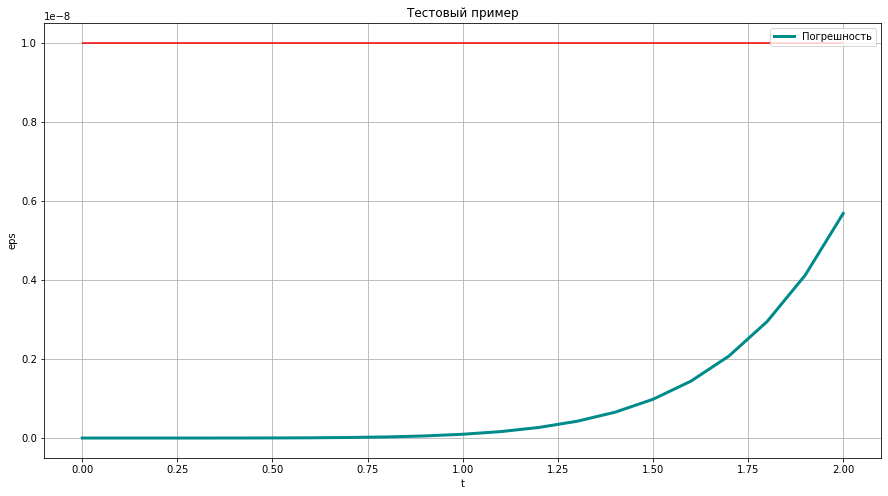

In [20]:
fig, ax = plt.subplots(figsize =(15,8))
plt.title('Тестовый пример')
ax.plot(x_tab_test_RK, real_solution(x_tab_test_RK), label = 'Аналитическое решение', color = 'lawngreen',linewidth =3)
ax.plot(x_tab, y_tab, label = 'Решение, полученное методом Рунге-Кутты', color = 'r',linewidth =4,linestyle = 'dotted')
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()


fig, ax = plt.subplots(figsize =(15,8))
plt.title('Тестовый пример')
ax.hlines(eps, 0, 2, color = 'r')
ax.plot(x_tab, abs(real_solution(x_tab_test_RK) - y_tab), label = 'Погрешность', color = 'darkcyan',linewidth =3)
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('eps')
ax.legend()

### 4. Сравнить время выполнения пп. 2 и 3.

In [21]:
print ("Точность eps: ", eps)
print("Время выполение табулирования с помощью метода Симпсона: {:.8f} секунд " .format(t_Simpson) )
print("Время выполение табулирования с помощью метода Рунге-Кутты 4-го порядка:{:.8f} секунд " .format(t_RK))
print("Разность времени выполнения м.Симпсона и м.Рунге-Кутты  4-го порядка:{:.8f} секунд " .format(abs(t_RK-t_Simpson)))

Точность eps:  1e-08
Время выполение табулирования с помощью метода Симпсона: 0.01804519 секунд 
Время выполение табулирования с помощью метода Рунге-Кутты 4-го порядка:0.10004234 секунд 
Разность времени выполнения м.Симпсона и м.Рунге-Кутты  4-го порядка:0.08199716 секунд 


### 5. Построить график зависимости времени табулирования от точности   в том и другом случае.

In [22]:
#метод Симпсона, рассматриваем eps:  [1.e-10 1.e-11 1.e-12 1.e-13 1.e-14]
h_tab= 0.1
eps_list = [1e-10]
time_list = []
n_segmet = 20

k = 5
print('\n\n')      
print ("eps: ", x_Simpson) 
for i in range (1, k):
    eps_list.append(eps_list[i-1]/10)
x_Simpson = np.array(eps_list)



for i in range (0, k):
    start_time = time.time()
    n_Simpson, x_tab_Simpson, y_tab_Simpson = tab_Simpson(a, b, h, f_S, y0,eps_list[i])
    t_RK = time.time() - start_time
    n_format = i + 10
    outputTable_Simpson(t_RK,time_list, eps_list, n_segmet, n_format,x_tab, y_tab)
    
print('\n')      
print ("eps: ", x_Simpson)    
y_Simpson = np.array(time_list)
print ("time: ", y_Simpson)
print("-----------------------------------------------------------------")   
print(' {:.6s}      {:.6s}'.format("eps", "t(eps)"))
for i in range(k):
    print('{:.0e}   {:.{}f}'.format(x_Simpson[i], y_Simpson[i], 8))
print('\n\n')       





eps:  [1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10 1.e-11 1.e-12
 1.e-13 1.e-14 1.e-15]
-----------------------------------------------------------------
Время выполнения табуляции 0.06729984 секунд 
Точность eps:  1e-10
Значение erf(x), посчитанное методом Симпсона 

0.0   2.0000000000
0.1   2.1051709181
0.2   2.2214027582
0.3   2.3498588076
0.4   2.4918246976
0.5   2.6487212707
0.6   2.8221188004
0.7   3.0137527075
0.8   3.2255409285
0.9   3.4596031112
1.0   3.7182818286
1.1   4.0041660241
1.2   4.3201169230
1.3   4.6692966680
1.4   5.0551999675
1.5   5.4816890713
1.6   5.9530324258
1.7   6.4739473938
1.8   7.0496474674
1.9   7.6858944464
2.0   8.3890561046
-----------------------------------------------------------------
Время выполнения табуляции 0.11165810 секунд 
Точность eps:  1e-11
Значение erf(x), посчитанное методом Симпсона 

0.0   2.00000000000
0.1   2.10517091808
0.2   2.22140275816
0.3   2.34985880758
0.4   2.49182469764
0.5   2.64872127070
0.6   2.82211880

In [23]:
def outputTable_RK(t_RK,time_list, eps_list, n_segmet, n_format,x_tab, y_tab):
    print("-----------------------------------------------------------------")
    print("Время выполнения табуляции {:.8f} секунд " .format(t_RK) )
    time_list.append(t_RK)
    print ("Точность eps: ","{:.0e}".format(eps_list[i]) )
    print("Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка \n")
    for j in range(n_segment+1):
        print('{:.1f}   {:.{}f}'.format(x_tab[j], y_tab[j], n_format))

In [24]:
h_tab= 0.1
eps_list = [1e-03]
time_list = []
n_segmet = 20
k = 13

for i in range (1, k):
    eps_list.append(eps_list[i-1]/10)
x_RK = np.array(eps_list)

for i in range (0, k):
    start_time = time.time()
    n, x_tab, y_tab = tab(a, b, h_tab, f, y0,eps_list[i])
    t_RK = time.time() - start_time
    outputTable_RK(t_RK,time_list, eps_list, n_segmet, i+3,x_tab, y_tab)

print('\n')      
print ("eps: ", x_RK)    
y_RK= np.array(time_list)
print ("time: ", y_RK)
print("-----------------------------------------------------------------")   
print(' {:.6s}      {:.6s}'.format("eps", "t(eps)"))
for i in range(k):
    print('{:.0e}   {:.{}f}'.format(x_RK[i], y_RK[i], 8))
print('\n\n') 

-----------------------------------------------------------------
Время выполнения табуляции 0.17725158 секунд 
Точность eps:  1e-03
Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка 

0.0   0.000
0.1   0.112
0.2   0.223
0.3   0.329
0.4   0.428
0.5   0.520
0.6   0.604
0.7   0.678
0.8   0.742
0.9   0.797
1.0   0.843
1.1   0.880
1.2   0.910
1.3   0.934
1.4   0.952
1.5   0.966
1.6   0.976
1.7   0.984
1.8   0.989
1.9   0.993
2.0   0.995
-----------------------------------------------------------------
Время выполнения табуляции 0.10977006 секунд 
Точность eps:  1e-04
Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка 

0.0   0.0000
0.1   0.1125
0.2   0.2227
0.3   0.3286
0.4   0.4284
0.5   0.5205
0.6   0.6039
0.7   0.6778
0.8   0.7421
0.9   0.7969
1.0   0.8427
1.1   0.8802
1.2   0.9103
1.3   0.9340
1.4   0.9523
1.5   0.9661
1.6   0.9763
1.7   0.9838
1.8   0.9891
1.9   0.9928
2.0   0.9953
-----------------------------------------------------------------
Время выполнени

In [25]:
#Метод Рунге-Кутты, eps:  [1.e-10 1.e-11 1.e-12 1.e-13 1.e-14]
h_tab= 0.1
eps_list = [1e-10]
time_list = []
n_segmet = 20

k = 5
print('\n\n')      
print ("eps: ", x_Simpson) 
for i in range (1, k):
    eps_list.append(eps_list[i-1]/10)
x_RK = np.array(eps_list)



for i in range (0, k):
    start_time = time.time()
    n, x_tab, y_tab = tab(a, b, h_tab, f, y0,eps_list[i])
    t_RK = time.time() - start_time
    outputTable_RK(t_RK,time_list, eps_list, n_segmet, i+10,x_tab, y_tab)
    
print('\n')      
print ("eps: ", x_RK)    
y_RK= np.array(time_list)
print ("time: ", y_RK)
print("-----------------------------------------------------------------")   
print(' {:.6s}      {:.6s}'.format("eps", "t(eps)"))
for i in range(k):
    print('{:.0e}   {:.{}f}'.format(x_RK[i], y_RK[i], 8))
print('\n\n') 




eps:  [1.e-10 1.e-11 1.e-12 1.e-13 1.e-14]
-----------------------------------------------------------------
Время выполнения табуляции 0.13607049 секунд 
Точность eps:  1e-10
Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка 

0.0   0.0000000000
0.1   0.1124629160
0.2   0.2227025892
0.3   0.3286267595
0.4   0.4283923551
0.5   0.5204998778
0.6   0.6038560909
0.7   0.6778011939
0.8   0.7421009648
0.9   0.7969082125
1.0   0.8427007930
1.1   0.8802050696
1.2   0.9103139782
1.3   0.9340079449
1.4   0.9522851196
1.5   0.9661051462
1.6   0.9763483829
1.7   0.9837904580
1.8   0.9890905010
1.9   0.9927904285
2.0   0.9953222643
-----------------------------------------------------------------
Время выполнения табуляции 0.26595592 секунд 
Точность eps:  1e-11
Значение erf(x), посчитанное методом Рунге-Кутты 4-го порядка 

0.0   0.00000000000
0.1   0.11246291602
0.2   0.22270258921
0.3   0.32862675946
0.4   0.42839235505
0.5   0.52049987783
0.6   0.60385609088
0.7   0.67780119389
0

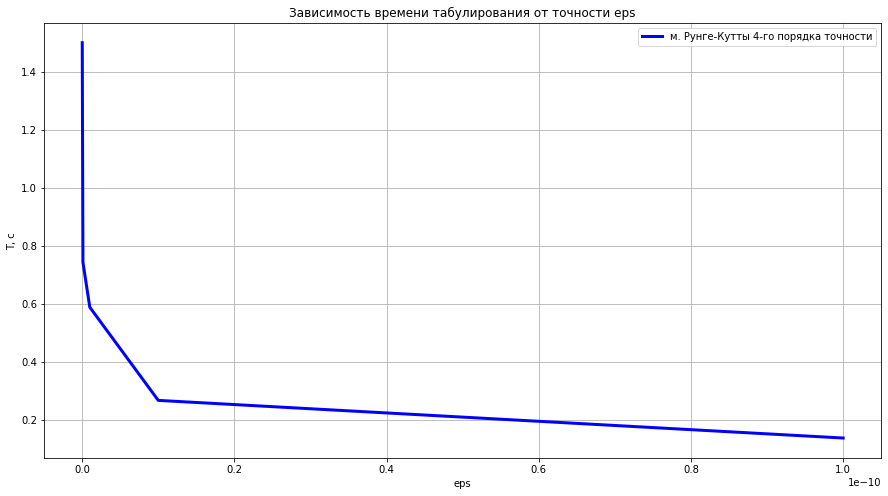

In [26]:
import matplotlib
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(15,8))
plt.title('Зависимость времени табулирования от точности eps')
ax.plot(x_RK, y_RK, label = 'м. Рунге-Кутты 4-го порядка точности', color = 'b',linewidth =3)
ax.grid()
ax.set_xlabel('eps')
ax.set_ylabel('T, c')
ax.legend()

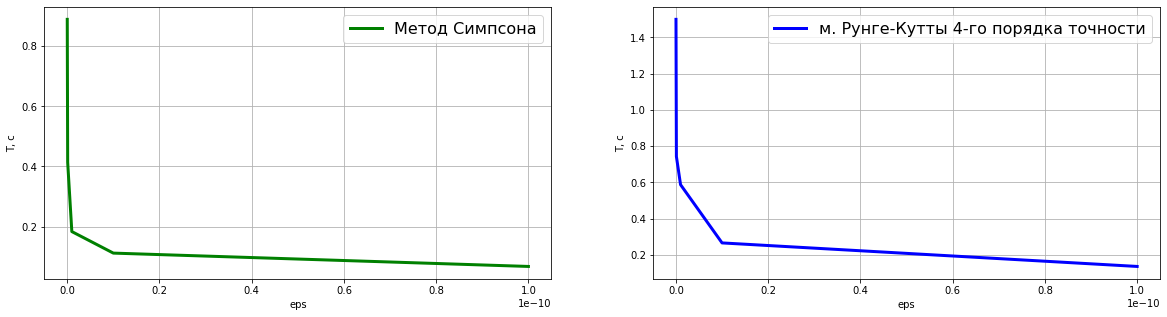

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
axs[0].plot(x_Simpson, y_Simpson, label = 'Метод Симпсона', color = 'g',linewidth =3)
axs[0].grid()
axs[0].legend()
for ax in axs.flat:
    ax.set(xlabel='eps', ylabel='T, c')

axs[1].plot(x_RK, y_RK, label = 'м. Рунге-Кутты 4-го порядка точности', color = 'b',linewidth =3)
axs[1].legend()
axs[1].grid()

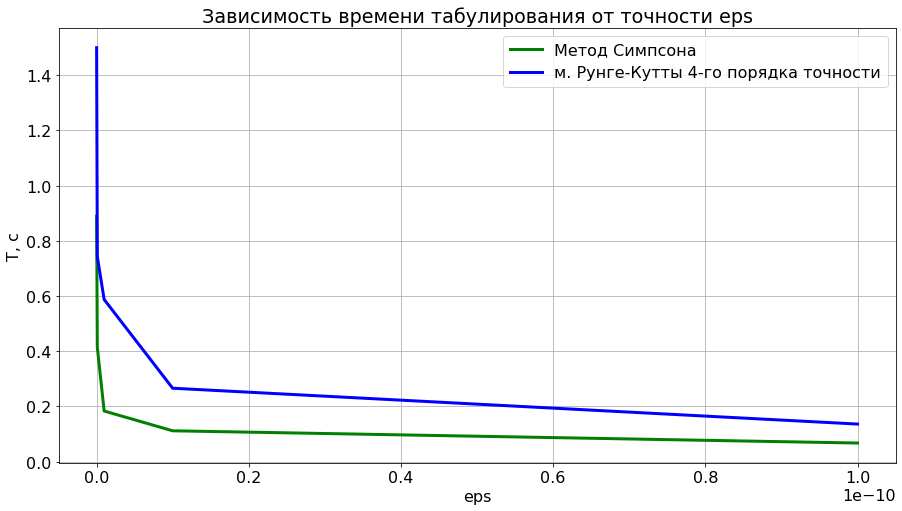

In [28]:
fig, ax = plt.subplots(figsize =(15,8))
plt.title('Зависимость времени табулирования от точности eps')
ax.plot(x_Simpson, y_Simpson, label = 'Метод Симпсона', color = 'g',linewidth =3)
ax.plot(x_RK, y_RK, label = 'м. Рунге-Кутты 4-го порядка точности', color = 'b',linewidth =3)
ax.grid()
ax.set_xlabel('eps')
ax.set_ylabel('T, c')
ax.legend()


